## Problem Statement No. 03


### Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ of iris.csv dataset. Calculate the measures of variability. Calculate and provide the visualization of the Correlation among the variables.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.drop('Id', axis = 1, inplace = True)

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
categories = [i for i in df['Species'].unique()]
categories

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [11]:
features = [i for i in df.columns if df[i].dtypes != 'O']
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
species_group = df.groupby('Species')

### Calculating mean, standard deviation and variance

In [14]:
species_group.mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [15]:
species_group.std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [16]:
species_group.var()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


In [17]:
pd.options.display.max_columns = 100

### Statistical Details of the species

In [18]:
species_group.describe()

SepalLengthCm                                               
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8  \
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm                                                 
                       count   mean       std  min    25%  50%    75%  max   
Species                                                                      
Iris-setosa             50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4  \
Iris-versicolor         50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Iris-virginica          50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

                PetalLengthCm                                                
                        count   mean       std  min  25%   50%    75%  max   
Species                                                                      
Iris-setosa              50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9  \
Iris-versicolor          50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica           50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                PetalWidthCm                                            
                       count   mean       std  min  25%  50%  75%  max  
Species                                                                 
Iris-setosa             50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor         50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica          50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

### Calculation Covariance without using pandas library

In [19]:
def covariance(x, y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])
    denominator = len(x) - 1
    cov = numerator/denominator
    return cov

In [20]:
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        if(i < j and i != j ):
            val = covariance(df[features[i]],df[features[j]])
            print('Covariance for {} and {} : {}'.format(features[i],features[j],val))


Covariance for SepalLengthCm and SepalWidthCm : -0.03926845637583892
Covariance for SepalLengthCm and PetalLengthCm : 1.2736823266219242
Covariance for SepalLengthCm and PetalWidthCm : 0.5169038031319912
Covariance for SepalWidthCm and PetalLengthCm : -0.32171275167785246
Covariance for SepalWidthCm and PetalWidthCm : -0.11798120805369122
Covariance for PetalLengthCm and PetalWidthCm : 1.2963874720357946


### Calculation Covariance without using pandas library

In [21]:
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        if(i < j and i != j ):
            val = df[features[i]].cov(df[features[j]])
            print('Covariance for {} and {} : {}'.format(features[i],features[j],val))

Covariance for SepalLengthCm and SepalWidthCm : -0.03926845637583891
Covariance for SepalLengthCm and PetalLengthCm : 1.2736823266219242
Covariance for SepalLengthCm and PetalWidthCm : 0.5169038031319911
Covariance for SepalWidthCm and PetalLengthCm : -0.32171275167785235
Covariance for SepalWidthCm and PetalWidthCm : -0.11798120805369125
Covariance for PetalLengthCm and PetalWidthCm : 1.296387472035794


### Calculating Covariance  using Pandas library

In [22]:
def correlation(x,y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([(sub_x[i]*sub_y[i]) for i in range(len(x))])
    std_x = sum([sub_x[i] **2 for i in range(len(x))])
    std_y = sum([sub_y[i] **2 for i in range(len(y))])
    denominator = (std_x*std_y) ** 0.5
    corr = numerator/denominator
    return corr
    

In [23]:
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        if(i < j and i != j ):
            val = correlation(df[features[i]],df[features[j]])
            print('Correlation for {} and {} : {}'.format(features[i],features[j],val))

Correlation for SepalLengthCm and SepalWidthCm : -0.10936924995064935
Correlation for SepalLengthCm and PetalLengthCm : 0.8717541573048719
Correlation for SepalLengthCm and PetalWidthCm : 0.8179536333691635
Correlation for SepalWidthCm and PetalLengthCm : -0.42051609640115484
Correlation for SepalWidthCm and PetalWidthCm : -0.3565440896138055
Correlation for PetalLengthCm and PetalWidthCm : 0.9627570970509667


### Calculating Correlation  using Pandas library

In [24]:
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        if(i < j and i != j ):
            val = df[features[i]].corr(df[features[j]])
            print('Covariance for {} and {} : {}'.format(features[i],features[j],val))


Covariance for SepalLengthCm and SepalWidthCm : -0.1093692499506493
Covariance for SepalLengthCm and PetalLengthCm : 0.8717541573048712
Covariance for SepalLengthCm and PetalWidthCm : 0.8179536333691636
Covariance for SepalWidthCm and PetalLengthCm : -0.42051609640115445
Covariance for SepalWidthCm and PetalWidthCm : -0.35654408961380574
Covariance for PetalLengthCm and PetalWidthCm : 0.9627570970509659


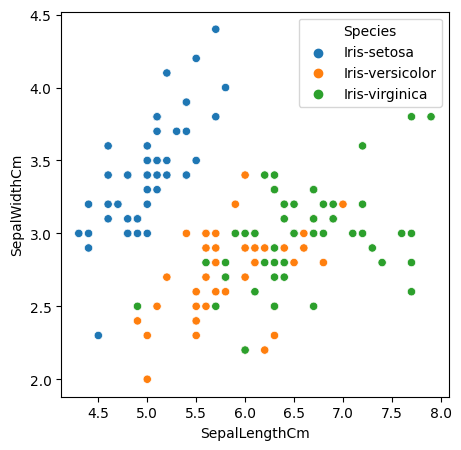

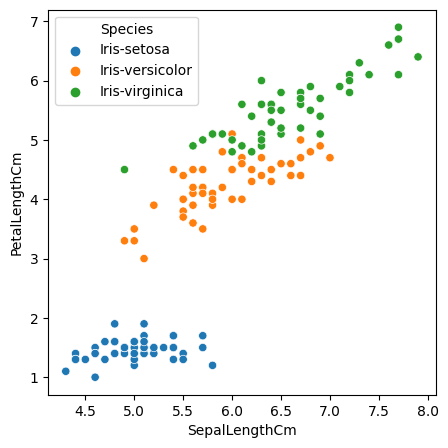

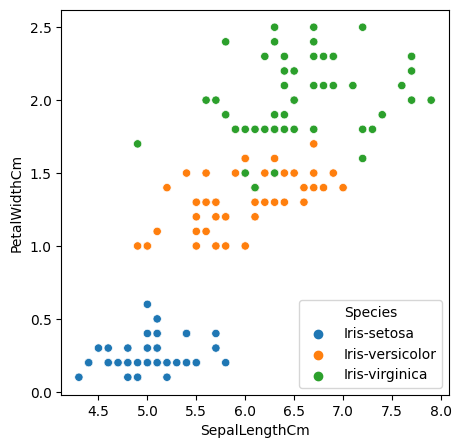

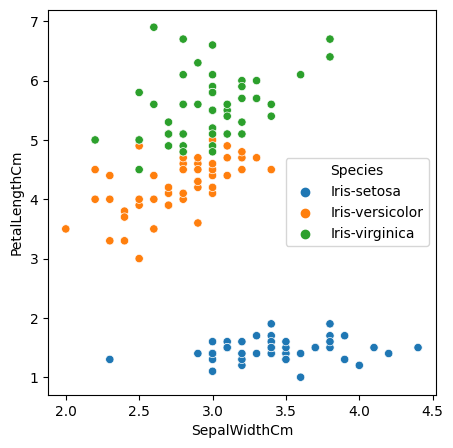

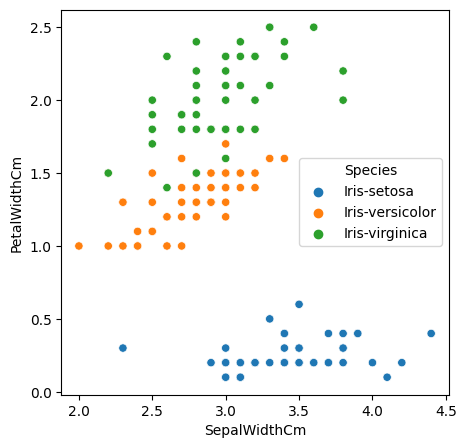

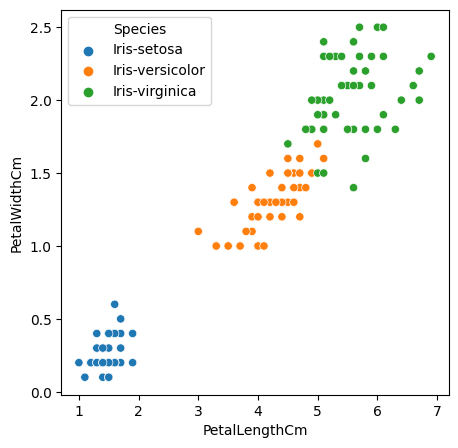

In [26]:
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        if(i<j and i != j ):
            fig = plt.figure()
            fig.set_figheight(5)
            fig.set_figwidth(5)
            ax = sns.scatterplot(x = features[i], y = features[j], data = df , hue = 'Species')

### Correlation Matrix

In [27]:
corrmatrix = df.corr(numeric_only=True)
corrmatrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

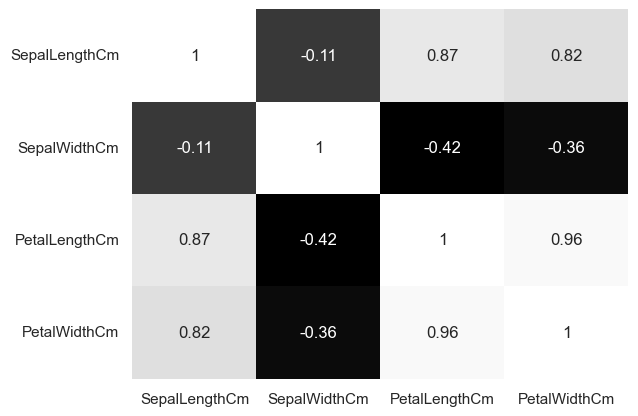

In [28]:
sns.set(style = 'whitegrid')
sns.heatmap(corrmatrix, cmap='gray', annot = True, cbar = False)